In [ ]:
IMPLEMENTATION OF DECISION TREE BASED ON ID3 ALGORITHM:
Decision tree is the most powerful and popular tool for classification and prediction. 
A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

In [ ]:
Construction of Decision Tree : 
A tree can be “learned” by splitting the source set into subsets based on an attribute value test. 
This process is repeated on each derived subset in a recursive manner called recursive partitioning. 
The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. 
The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. 
Decision trees can handle high dimensional data. In general decision tree classifier has good accuracy. 
Decision tree induction is a typical inductive approach to learn knowledge on classification. 

In [ ]:
Decision Tree Representation: 
Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. 
An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. 
This process is then repeated for the subtree rooted at the new node. 

In [ ]:
In Decision Tree the major challenge is to identification of the attribute for the root node in each level. 
This process is known as attribute selection. We have two popular attribute selection measures:
1. Information Gain
2. Gini Index

1. Information Gain
When we use a node in a decision tree to partition the training instances into smaller subsets the entropy changes. 
Information gain is a measure of this change in entropy.

(i) Entropy
Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. 
The higher the entropy more the information content.

2. Gini Index
Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
It means an attribute with lower Gini index should be preferred.

In [ ]:
The most notable types of decision tree algorithms are:-
1. Iterative Dichotomiser 3 (ID3)
2. C4.5
3. Classification and Regression Tree(CART)

In [ ]:
Iterative Dichotomiser 3 (ID3): 
This algorithm uses Information Gain to decide which attribute is to be used classify the current subset of the data. 
For each level of the tree, information gain is calculated for the remaining data recursively.

In [ ]:
Importing the required libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
from numpy import log2 as log

In [ ]:
‘eps’ here is the smallest representable number. At times we get log(0) or 0 in the denominator, to avoid that we are going to use this.

In [ ]:
Reading and defining the datatset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving play_tennis.csv to play_tennis (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['play_tennis.csv']))
# Dataset is now stored in a Pandas Dataframe

print(data)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [ ]:
Creating pandas dataframe:

In [ ]:
data = data.drop("day", axis=1)
df = pd.DataFrame(data, columns=data.keys())

In [ ]:
Steps for creating a decision tree:
1. Compute the entropy for data-set
2. For every attribute/feature:
       i.) Calculate entropy for all categorical values
       ii.) Take average information entropy for the current attribute
       iii.) Calculate gain for the current attribute
3. Pick the highest gain attribute.
4. Repeat until we get the tree we desire.

In [ ]:
# 1. Calculating entropy of the whole dataset

entropy_node = 0  # Initialize Entropy
values = df.play.unique()  # Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    entropy_node += -fraction*np.log2(fraction)

In [ ]:
# 2. Now defining a function {ent} to calculate entropy of each attribute 
def ent(df,attribute):
    target_variables = df.play.unique()  # This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    # This gives different features in that attribute 


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) # numerator
            den = len(df[attribute][df[attribute]==variable])  # denominator
            fraction = num/(den+eps)  # pi
            entropy_each_feature += -fraction*log(fraction+eps) # This calculates entropy for one feature 
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   # Sums up all the entropy 

    return(abs(entropy_attribute))

In [ ]:
# Storing entropy of each attribute with its name
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'humidity': 0.7884504573082889,
 'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'wind': 0.892158928262361}

In [ ]:
# 3. Calculating information gain of each attribute
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

In [ ]:
# Storing information gain of each attribute in a dictionary

# entropy_node = entropy of dataset
# a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}

In [ ]:
As we can see outlook has the highest info gain of 0.24, therefore we will select outook as the node at this level for splitting.

In [ ]:
To proceed with our tree we will use recursion and we will build a tree based on this:

In [ ]:
def find_entropy(df):
    Class = df.keys()[-1]   # To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   # To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  # This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    # This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        # Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   # To make the code generic, changing target variable class name
    
    # Here we build our decision tree

    # Get attribute with maximum information gain
    node = find_winner(df)
    
    # Get distinct value of that attribute e.g Salary is node and Low, Med and High are values
    attValue = np.unique(df[node])
    
    # Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   # We make loop to construct a tree by calling this function recursively. 
    # In this we check if the subset is pure and stop if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[df.columns[-1]],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [ ]:
t = buildTree(df)

import pprint
pprint.pprint(t)

{'outlook': {'Overcast': 'Yes',
             'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [ ]:
Visualizing the decision tree using Scikit-learn library:

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['outlook'] = Le.fit_transform(data['outlook'])
data['temp'] = Le.fit_transform(data['temp'])
data['humidity'] = Le.fit_transform(data['humidity'])
data['wind'] = Le.fit_transform(data['wind'])
data['play'] = Le.fit_transform(data['play'])

In [ ]:
y = data['play']
X = data.drop(['play'],axis=1)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232,

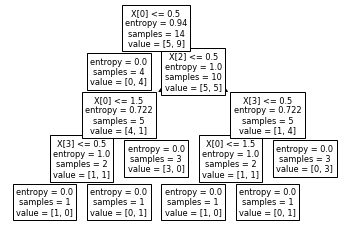

In [ ]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

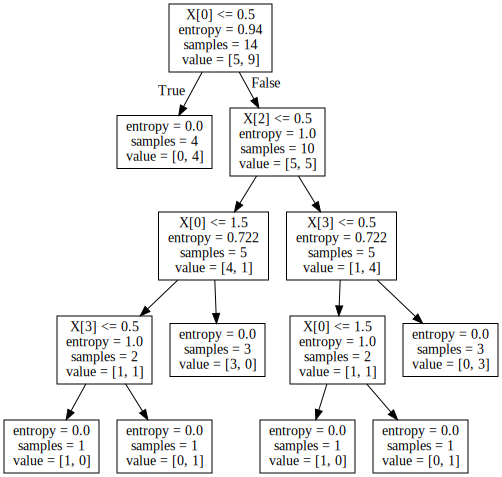

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph